In [19]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import matplotlib.figure as ff

# importar librerias de preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

# importar metricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [20]:
#CARGA DEL DATASET EN UN DATAFRAME DE PANDAS
df = pd.read_excel("Tabla_GDP_1parcial.xlsx")
df

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,NaN,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,NaN,NaN,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440
8,Jujuy,NaN,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415


In [21]:
#ANALIZAMOS VALORES NULOS
df.isnull().sum()

province                  0
gdp                       2
illiteracy                2
poverty                   0
deficient_infra           0
school_dropout            2
no_healthcare             2
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

In [22]:
#ANALIZAMOS QUE MEDIDA DE TENDENCIA CENTRAL VAMOS A USAR PARA IMPUTAR LOS VALORES NULOS
school_media = df["school_dropout"].mean()
school_mediana = df["school_dropout"].median()
print(f"La media es: {round(school_media, 2)} y la mediana: {round(school_mediana, 2)}")

La media es: 1.75 y la mediana: 1.44


In [23]:
illiteracy_media = df["illiteracy"].mean()
illiteracy_mediana = df["illiteracy"].median()
print(f"La media es: {round(illiteracy_media, 2)} y la mediana: {round(illiteracy_mediana, 2)}")

La media es: 3.17 y la mediana: 2.74


In [24]:
#COMO PARTE DEL PREPROCESAMIENTO DE DATOS, IMPUTAMOS LOS VALORES NULOS POR LA MEDIANA QUE ES EL VALOR O MEDIDA DE 
#TENDENCIA CENTRAL QUE ERA MÁS ACORDE EN NUESTRO CONJUNTO DE DATOS
school_mediana = df["school_dropout"].median()
illiteracy_mediana = df["illiteracy"].median()

df["school_dropout"].fillna(school_mediana, inplace= True)
df["illiteracy"].fillna(illiteracy_mediana, inplace= True)

C:\Users\kemer\AppData\Local\Temp\ipykernel_22672\3369324567.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["school_dropout"].fillna(school_mediana, inplace= True)
C:\Users\kemer\AppData\Local\Temp\ipykernel_22672\3369324567.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [25]:
#GENERAMOS LOS DATOS DE LOS QUARTILES:
quartiles = np.array(df["school_dropout"].quantile([0.25, 0.50, 0.75]))
quartiles = quartiles.tolist()
quartiles

[0.8126169464579043, 1.4377668863334205, 2.5144960808516252]

In [26]:
#CREAMOS UNA COLUMNA VACÍA U OBJETIVO
df["school_dropout_index"] = ""

In [27]:
#LE PASAMOS LAS CONDICIONES A LA COLUMNA PARA OBTENER NUESTROS DATOS "CATEGORIZADOS"
df.loc[df["school_dropout"] < quartiles[0], "school_dropout_index"] = 'Bajo'
df.loc[(df["school_dropout"] >= quartiles[0]) & (df["school_dropout"] < quartiles[1]), "school_dropout_index"] = 'Medio'
df.loc[df["school_dropout"] >= quartiles[1],"school_dropout_index"] = 'Alto'
df

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,school_dropout_index
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836,Bajo
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502,Medio
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175,Medio
3,Corrientes,7.968013e+06,2.743675,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495,Alto
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605,Alto
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498,Bajo
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.437767,NaN,3.1,1235994,0.000006,0.004679,Alto
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440,Alto
8,Jujuy,NaN,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958,Bajo
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415,Bajo


In [28]:
#ESTANDARIZAMOS LAS VARIABLES
scaler = StandardScaler()
df[["z_school_dropout", "z_illiteracy", "z_doctors_per_cap"]] = scaler.fit_transform(df[["school_dropout", "illiteracy", "doctors_per_cap"]])

In [29]:
#SELECCIONAMOS LAS VARIABLES PARA EL CLÚSTER
X_clustering = df[["z_school_dropout", "z_illiteracy", "z_doctors_per_cap"]]

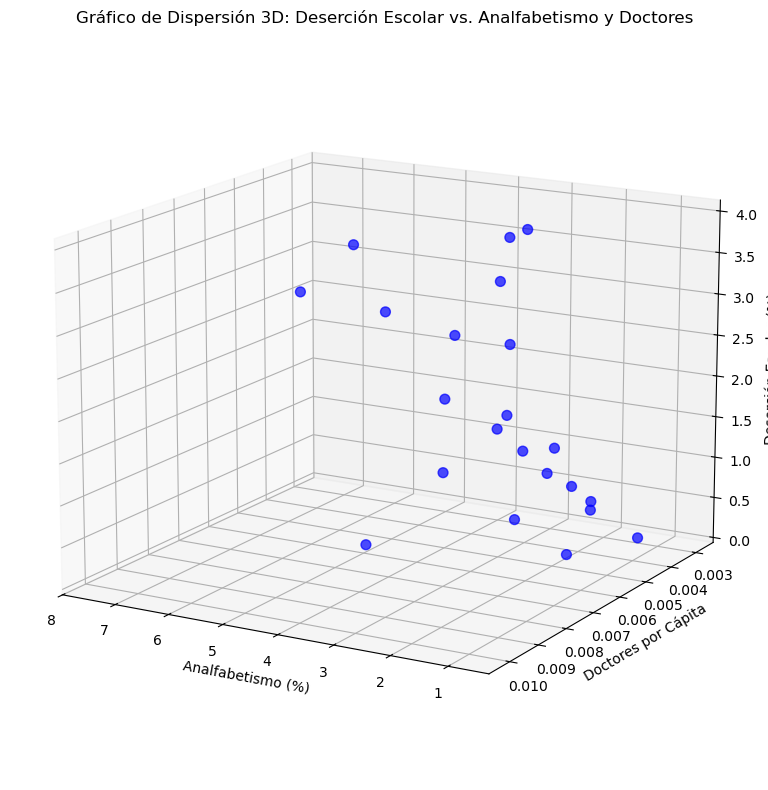

In [30]:
#GRÁFICO DE DISPERSIÓN 3D
x_var = df['illiteracy'].values
y_var = df['doctors_per_cap'].values
z_var = df['school_dropout'].values

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x_var, y_var, z_var,
           c='blue',    
           s=50,         
           alpha=0.7)

ax.set_xlabel('Analfabetismo (%)')
ax.set_ylabel('Doctores por Cápita')
ax.set_zlabel('Deserción Escolar (%)')
ax.set_title('Gráfico de Dispersión 3D: Deserción Escolar vs. Analfabetismo y Doctores')

ax.view_init(elev=15, azim=120)

plt.tight_layout()
plt.show()

In [31]:
#CÁLCULO DE DISTANCIAS EUCLIDEAS ENTRE LOS PUNTOS
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

clus = hierarchy.linkage(X_clustering, "single")
clus

array([[ 0.        ,  5.        ,  0.29409624,  2.        ],
       [ 3.        , 10.        ,  0.40219973,  2.        ],
       [ 1.        ,  8.        ,  0.43452148,  2.        ],
       [11.        , 13.        ,  0.46582008,  2.        ],
       [ 6.        , 15.        ,  0.47341338,  2.        ],
       [16.        , 23.        ,  0.50143031,  3.        ],
       [22.        , 24.        ,  0.51891544,  4.        ],
       [18.        , 28.        ,  0.53570799,  5.        ],
       [25.        , 29.        ,  0.59466725,  7.        ],
       [14.        , 30.        ,  0.60051186,  8.        ],
       [ 9.        , 31.        ,  0.64166141,  9.        ],
       [26.        , 32.        ,  0.66431931, 11.        ],
       [21.        , 33.        ,  0.7680877 , 12.        ],
       [ 4.        , 12.        ,  0.79006816,  2.        ],
       [20.        , 35.        ,  0.79663971,  3.        ],
       [17.        , 34.        ,  0.91201212, 13.        ],
       [ 7.        , 36.

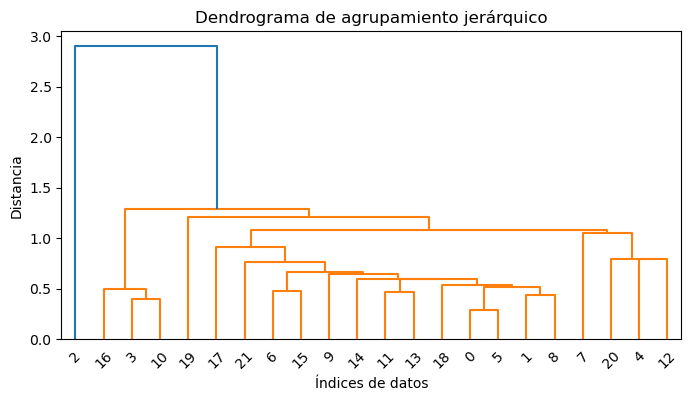

In [32]:
#CREAMOS EL DENDOGRAMA
plt.figure(figsize=(8, 4))
dendrogram = hierarchy.dendrogram(clus)

# Personalizar el gráfico (opcional)
plt.title("Dendrograma de agrupamiento jerárquico")
plt.xlabel("Índices de datos")
plt.ylabel("Distancia")
plt.show()

In [33]:
# Cambiar el indice de los datos por una variable categorica "provincia"
X_clustering.index = df['province']
X_clustering.index
X_clustering.index

Index(['Buenos Aires', 'Catamarca', 'Córdoba', 'Corrientes', 'Chaco', 'Chubut',
       'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza',
       'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis',
       'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tucumán'],
      dtype='object', name='province')

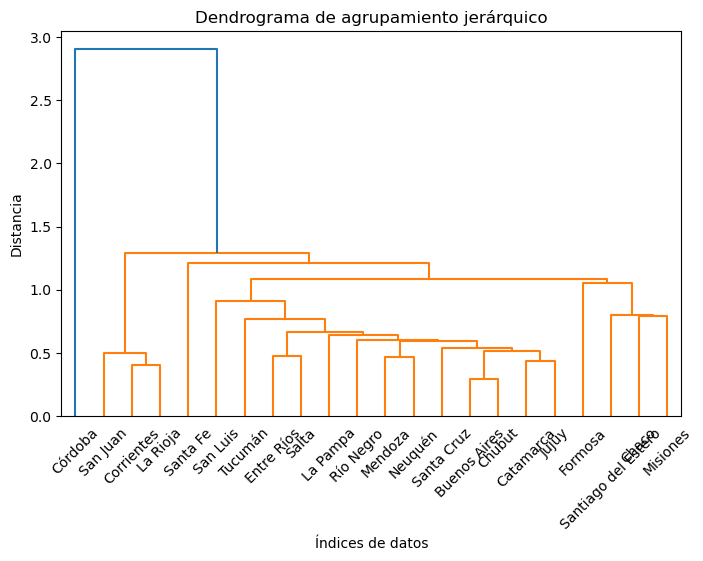

In [34]:
#DENDOGRAMA CON EL NOMBRE DE LAS PROVINCIAS EN VEZ DE LOS ÍNDICES
plt.figure(figsize = (8, 5))
dendrogram = hierarchy.dendrogram(clus, labels = X_clustering.index)
                                  
plt.title("Dendrograma de agrupamiento jerárquico")
plt.xlabel("Índices de datos")
plt.ylabel("Distancia")
plt.show()

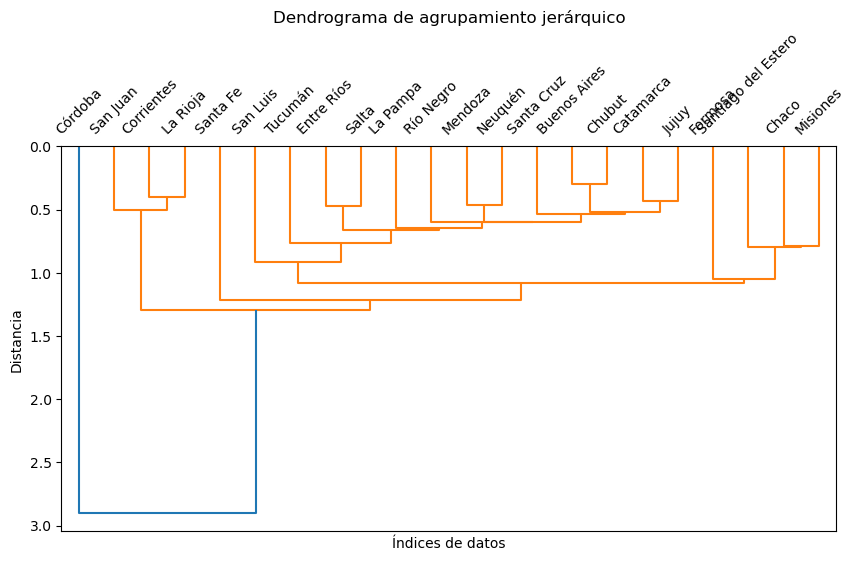

In [35]:
#DENDOGRAMA HACIA ABAJO
plt.figure(figsize = (10, 5))
dendrogram = hierarchy.dendrogram(clus, labels = X_clustering.index, orientation = 'bottom')
                                  
plt.title("Dendrograma de agrupamiento jerárquico")
plt.xlabel("Índices de datos")
plt.ylabel("Distancia")
plt.show()

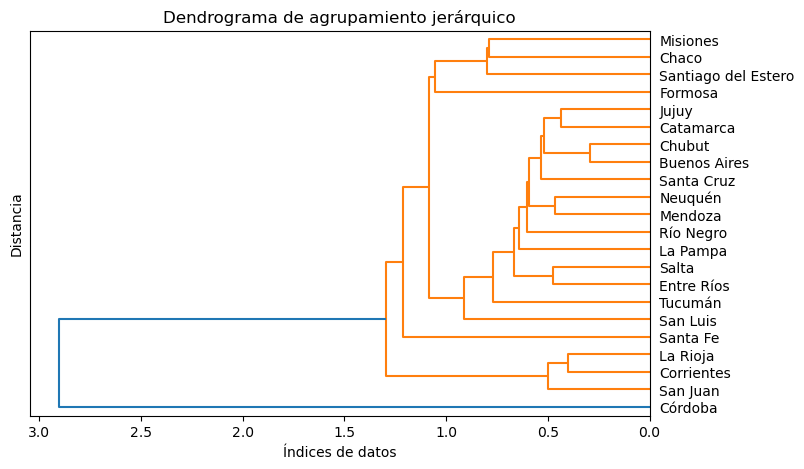

In [36]:
#DENDOGRAMA DESDE LA DERECHA HACIA LA IZQUIERDA
plt.figure(figsize = (8, 5))
dendrogram = hierarchy.dendrogram(clus, labels = X_clustering.index, orientation = 'left')
                                  
plt.title("Dendrograma de agrupamiento jerárquico")
plt.xlabel("Índices de datos")
plt.ylabel("Distancia")
plt.show()

In [37]:
#ANALIZANDO EL DE DENDOGRAMA, SE ELIGE PROBAR CON 2 Y 3 CLÚSTERES
from scipy.cluster.hierarchy import fcluster

num_clusters = 2

df['cluster_etiqueta'] = fcluster(clus, num_clusters, criterion = 'maxclust')

print(df['cluster_etiqueta'].value_counts())

#ALGUNAS CARACTERÍSTICAS DE NUESTROS CLÚSTERES
print("\nCaracterísticas promedio por Cluster:")
print(df.groupby('cluster_etiqueta')[['school_dropout', 'illiteracy', 'doctors_per_cap']].mean())

#PROVINCIAS DE CADA CLÚSTER
for i in range(1, num_clusters+1):
    print(f"\nProvincias en el Cluster {i}:")
    print(df[df['cluster_etiqueta'] == i]['province'].tolist())

cluster_etiqueta
1    21
2     1
Name: count, dtype: int64

Características promedio por Cluster:
                  school_dropout  illiteracy  doctors_per_cap
cluster_etiqueta                                             
1                       1.754125     3.14768         0.004642
2                       1.035056     2.71414         0.010175

Provincias en el Cluster 1:
['Buenos Aires', 'Catamarca', 'Corrientes', 'Chaco', 'Chubut', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tucumán']

Provincias en el Cluster 2:
['Córdoba']


In [38]:
#3 CLÚSTERES
num_clusters = 3

df['cluster_etiqueta'] = fcluster(clus, num_clusters, criterion = 'maxclust')

print(df['cluster_etiqueta'].value_counts())

#ALGUNAS CARACTERÍSTICAS DE NUESTROS CLÚSTERES
print("\nCaracterísticas promedio por Cluster:")
print(df.groupby('cluster_etiqueta')[['school_dropout', 'illiteracy', 'doctors_per_cap']].mean())

#PROVINCIAS DE CADA CLÚSTER
for i in range(1, num_clusters+1):
    print(f"\nProvincias en el Cluster {i}:")
    print(df[df['cluster_etiqueta'] == i]['province'].tolist())

cluster_etiqueta
2    18
1     3
3     1
Name: count, dtype: int64

Características promedio por Cluster:
                  school_dropout  illiteracy  doctors_per_cap
cluster_etiqueta                                             
1                       3.669209    2.826715         0.004877
2                       1.434944    3.201174         0.004603
3                       1.035056    2.714140         0.010175

Provincias en el Cluster 1:
['Corrientes', 'La Rioja', 'San Juan']

Provincias en el Cluster 2:
['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tucumán']

Provincias en el Cluster 3:
['Córdoba']


In [39]:
#4 CLÚSTERES
num_clusters = 4

df['cluster_etiqueta'] = fcluster(clus, num_clusters, criterion = 'maxclust')

print(df['cluster_etiqueta'].value_counts())

#ALGUNAS CARACTERÍSTICAS DE NUESTROS CLÚSTERES
print("\nCaracterísticas promedio por Cluster:")
print(df.groupby('cluster_etiqueta')[['school_dropout', 'illiteracy', 'doctors_per_cap']].mean())

#PROVINCIAS DE CADA CLÚSTER
for i in range(1, num_clusters+1):
    print(f"\nProvincias en el Cluster {i}:")
    print(df[df['cluster_etiqueta'] == i]['province'].tolist())

cluster_etiqueta
2    17
1     3
4     1
3     1
Name: count, dtype: int64

Características promedio por Cluster:
                  school_dropout  illiteracy  doctors_per_cap
cluster_etiqueta                                             
1                       3.669209    2.826715         0.004877
2                       1.350401    3.273246         0.004481
3                       2.872181    1.975940         0.006672
4                       1.035056    2.714140         0.010175

Provincias en el Cluster 1:
['Corrientes', 'La Rioja', 'San Juan']

Provincias en el Cluster 2:
['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Luis', 'Santa Cruz', 'Santiago del Estero', 'Tucumán']

Provincias en el Cluster 3:
['Santa Fe']

Provincias en el Cluster 4:
['Córdoba']
